In [1]:
from sympy.abc import x,y,z,t
from sympy import solve, exp, log, Matrix, simplify, factor, expand, limit, oo, re, im
from sympy.tensor.array import derive_by_array

In [64]:
f = x**4 -4*x*y +y**4
gradient = derive_by_array(f, [x,y])

In [3]:
g0 = gradient.subs({x:1., y:-1.})
g0

[8.00000000000000, -8.00000000000000]

In [4]:
phi_0 = f.subs({x:1-t*g0[0], y:-1-t*g0[1]})
expand(phi_0)

8192.0*t**4 - 4096.0*t**3 + 1024.0*t**2 - 128.0*t + 6

In [5]:
def mint(f):
    df = derive_by_array(f,t)
    end = limit(f, t, oo).evalf()
    start = f.subs({t:0.})
#     print("Start and End")
#     print(start)
#     print(end)
    if end<start:
        target = end
        output = oo
    else:
        target = start
        output = 0.
      
    crits = [a.evalf() for a in solve(df) if (np.abs(im(a))<=np.epsilon and re(a)>=0)]
    for a in crits:
        target_v = f.subs({t:a})
        if target_v < target:
            output = a
            target = target_v
    return output

In [6]:
mint(t-log(t))

1.00000000000000

In [7]:
mint(phi_0)

0.125000000000000

In [79]:
def steepest2(f, x0, y0, steps, verbatim=False):
    output_str  = "\\begin{tabular}{|r|r|r|r|} \\hline \n"
    output_str += " $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\\\ \\hline \\hline \n"
    output_str += "$0$ & $%1.6f$ & $%1.6f$ & $%1.6f$ \\\\ \\hline \n" % (x0, y0, f.subs({x:x0, y:y0}))
    gradient = derive_by_array(f, [x,y])
    outputx = [x0]
    outputy = [y0]
    for step in range(steps):
        g0 = gradient.subs({x:x0, y:y0})
        phi = f.subs({x: x0-t*g0[0], y: y0-t*g0[1]})
        if verbatim: 
            print(expand(phi))
#             print(solve(phi))
#         t0 = mint(phi)
        t0 = findroot(lambda s: phi.diff().subs({t:s}), 0)
#         print(t0)
        xn = x0 - t0*g0[0]
        yn = y0 - t0*g0[1]
        outputx.append(xn)
        outputy.append(yn)
        output_str += "$%d$ & $%1.6f$ & $%1.6f$ & $%1.6f$ \\\\ \\hline \n" % (step+1,xn,yn,f.subs({x:xn, y:yn}))
        x0,y0 = xn,yn
    output_str += "\\end{tabular}"
    return outputx, outputy, output_str

In [66]:
ox1,oy1,os = steepest2(f, -1.,1.,7,verbatim=True)
print(os)
ox1=ox1[:2]
oy1=oy1[:2]

8192.0*t**4 - 4096.0*t**3 + 1024.0*t**2 - 128.0*t + 6.0
0.125
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-1.000000$ & $1.000000$ & $6.000000$ \\ \hline 
$1$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$2$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$3$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$4$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$5$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$6$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$7$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
\end{tabular}


In [67]:
ox2,oy2,os = steepest2(f, 3.5,2.1,16)
print(os)
ox2=ox2[:16]
oy2=oy2[:16]

0.0150553520449164
0.0397059475411571
0.0782922331516247
0.0728882589567161
0.0903338091173018
0.0759353359355821
0.0916582245786393
0.0762517212521313
0.0917960895833971
0.0762844690829562
0.0918103627421352
0.0762878574862414
0.0918118396109384
0.0762882080633618
0.0918119923702389
0.0762882444463362
\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $3.500000$ & $2.100000$ & $140.110600$ \\ \hline 
$1$ & $1.044472$ & $1.753064$ & $3.310777$ \\ \hline 
$2$ & $1.141931$ & $1.063276$ & $-1.878163$ \\ \hline 
$3$ & $1.008581$ & $1.044435$ & $-1.988879$ \\ \hline 
$4$ & $1.013966$ & $1.006319$ & $-1.998931$ \\ \hline 
$5$ & $1.000898$ & $1.004472$ & $-1.999891$ \\ \hline 
$6$ & $1.001437$ & $1.000651$ & $-1.999989$ \\ \hline 
$7$ & $1.000093$ & $1.000461$ & $-1.999999$ \\ \hline 
$8$ & $1.000149$ & $1.000067$ & $-2.000000$ \\ \hline 
$9$ & $1.000010$ & $1.000048$ & $-2.000000$ \\ \hline 
$10$ & $1.000015$ & $1.000007$ & $-2.000000$ \\ \hline 
$

In [97]:
ox3,oy3,os = steepest2(f, -13.5,-7.3,2)
print(os)

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-13.500000$ & $-7.300000$ & $35660.686600$ \\ \hline 
$1$ & $2.362722$ & $-4.871733$ & $640.498302$ \\ \hline 
$2$ & $1.434154$ & $1.194162$ & $-0.586492$ \\ \hline 
\end{tabular}


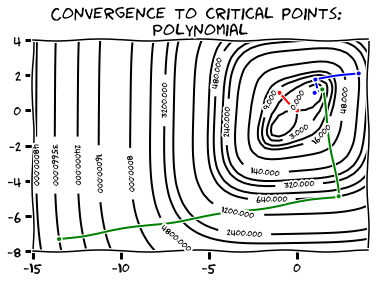

In [98]:
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.xkcd();

xx = np.linspace(-15,4)
yy = np.linspace(-8,4)
X,Y = np.meshgrid(xx,yy)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, X**4-4*X*Y+Y**4, levels=[0,3,9,16,48,140,240,320,480,640,1200,2400,3200,4800,8000,16000,24000,35660,48000], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox1,oy1,'r')
plt.plot(ox1,oy1,'.r')
plt.plot(ox2,oy2,'b')
plt.plot(ox2,oy2,'.b')
plt.plot(ox3,oy3,'g')
plt.plot(ox3,oy3,'.g')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
plt.title("Convergence to critical points: \nPolynomial")
plt.show()

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-1.000000$ & $-2.000000$ & $13.000000$ \\ \hline 
$1$ & $0.378555$ & $-1.483042$ & $3.031194$ \\ \hline 
$2$ & $-0.029793$ & $-0.394111$ & $1.216499$ \\ \hline 
$3$ & $0.589858$ & $-0.161742$ & $0.427984$ \\ \hline 
$4$ & $0.491075$ & $0.101678$ & $0.278458$ \\ \hline 
$5$ & $0.693312$ & $0.177517$ & $0.185966$ \\ \hline 
$6$ & $0.640306$ & $0.318867$ & $0.137684$ \\ \hline 
$7$ & $0.758223$ & $0.363086$ & $0.103322$ \\ \hline 
$8$ & $0.723373$ & $0.456019$ & $0.081045$ \\ \hline 
$9$ & $0.803479$ & $0.486058$ & $0.064067$ \\ \hline 
$10$ & $0.778288$ & $0.553234$ & $0.051912$ \\ \hline 
$11$ & $0.837072$ & $0.575278$ & $0.042274$ \\ \hline 
$12$ & $0.817849$ & $0.626539$ & $0.034971$ \\ \hline 
$13$ & $0.863048$ & $0.643489$ & $0.029030$ \\ \hline 
$14$ & $0.847860$ & $0.683991$ & $0.024363$ \\ \hline 
$15$ & $0.883714$ & $0.697436$ & $0.020497$ \\ \hline 
$16$ & $0.871421$ & $0.730216$ & $

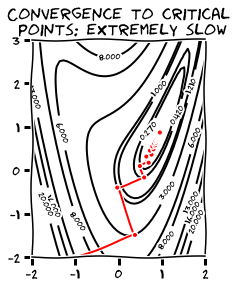

In [103]:
R = (1-x)**2+(y-x**2)**2
ox,oy,os = steepest2(R, -1., -2., 27)
print(os)

xx = np.linspace(-2,2)
yy = np.linspace(-2,3)
X,Y = np.meshgrid(xx,yy)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0.27,0.42,1,1.21,3,6,8,13,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'.r')
# plt.xlim(0.5,1.1)
# plt.ylim(0.5,1.1)
plt.title("Convergence to critical\n points: extremely slow")
plt.show()

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $0.000000$ & $0.500000$ & $1.250000$ \\ \hline 
$1$ & $0.629348$ & $0.185326$ & $0.181800$ \\ \hline 
$2$ & $1.000000$ & $0.926629$ & $0.005383$ \\ \hline 
$3$ & $0.974549$ & $0.939354$ & $0.000756$ \\ \hline 
$4$ & $1.000000$ & $0.990256$ & $0.000095$ \\ \hline 
$5$ & $0.996637$ & $0.991937$ & $0.000013$ \\ \hline 
$6$ & $1.000000$ & $0.998663$ & $0.000002$ \\ \hline 
$7$ & $0.999539$ & $0.998893$ & $0.000000$ \\ \hline 
$8$ & $1.000000$ & $0.999816$ & $0.000000$ \\ \hline 
$9$ & $0.999936$ & $0.999847$ & $0.000000$ \\ \hline 
$10$ & $1.000000$ & $0.999975$ & $0.000000$ \\ \hline 
$11$ & $0.999991$ & $0.999979$ & $0.000000$ \\ \hline 
$12$ & $1.000000$ & $0.999996$ & $0.000000$ \\ \hline 
$13$ & $0.999999$ & $0.999997$ & $0.000000$ \\ \hline 
$14$ & $1.000000$ & $1.000000$ & $0.000000$ \\ \hline 
\end{tabular}


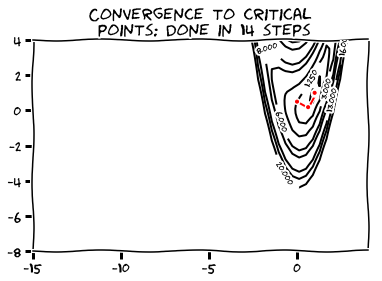

In [102]:
ox,oy,os = steepest2(R, 0., 0.5, 14)
print(os)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0,0.000002,0.000013,0.000095,0.000756,0.005383,0.1818,1.25,3,6,8,13,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'.r')
# plt.xlim(0.5,1.1)
# plt.ylim(0.5,1.1)
plt.title("Convergence to critical\n points: Done in 14 steps")
plt.show()

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-1.900000$ & $2.000000$ & $11.002100$ \\ \hline 
$1$ & $-0.166290$ & $2.309522$ & $6.567163$ \\ \hline 
$2$ & $0.256054$ & $-0.056128$ & $0.568264$ \\ \hline 
$3$ & $0.613477$ & $0.007683$ & $0.285318$ \\ \hline 
$4$ & $0.568566$ & $0.259241$ & $0.190235$ \\ \hline 
$5$ & $0.715784$ & $0.285524$ & $0.132227$ \\ \hline 
$6$ & $0.689755$ & $0.431319$ & $0.098227$ \\ \hline 
$7$ & $0.779264$ & $0.447299$ & $0.074310$ \\ \hline 
$8$ & $0.761554$ & $0.546496$ & $0.057977$ \\ \hline 
$9$ & $0.823325$ & $0.557524$ & $0.045696$ \\ \hline 
$10$ & $0.810322$ & $0.630358$ & $0.036667$ \\ \hline 
$11$ & $0.855862$ & $0.638488$ & $0.029614$ \\ \hline 
$12$ & $0.845883$ & $0.694385$ & $0.024199$ \\ \hline 
$13$ & $0.880846$ & $0.700627$ & $0.019862$ \\ \hline 
$14$ & $0.872964$ & $0.744776$ & $0.016437$ \\ \hline 
$15$ & $0.900551$ & $0.749702$ & $0.013647$ \\ \hline 
$16$ & $0.894200$ & $0.785276$ & $0.0

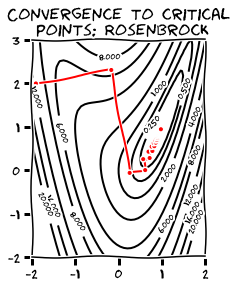

In [108]:
ox,oy,os = steepest2(R, -1.9, 2., 34)
print(os)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0.25,0.5,1,2,4,6,8,12,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'.r')
# plt.xlim(0.5,1.1)
# plt.ylim(0.5,1.1)
plt.title("Convergence to critical\n points: Rosenbrock")
plt.show()

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-100.000000$ & $40.000000$ & $76050.000000$ \\ \hline 
$1$ & $-1.025060$ & $19.867118$ & $3591.615327$ \\ \hline 
$2$ & $-4.555081$ & $2.513241$ & $174.058930$ \\ \hline 
$3$ & $0.113150$ & $1.563658$ & $12.867208$ \\ \hline 
$4$ & $-0.053347$ & $0.745149$ & $5.264475$ \\ \hline 
$5$ & $0.166834$ & $0.700361$ & $4.905886$ \\ \hline 
$6$ & $0.158981$ & $0.661755$ & $4.888973$ \\ \hline 
$7$ & $0.169366$ & $0.659643$ & $4.888175$ \\ \hline 
\end{tabular}


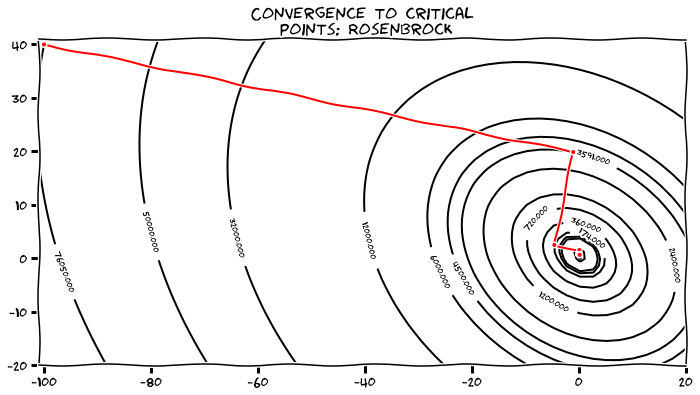

In [17]:
f = 10*y**2+5*x*y+8*x**2-14*y-6*x+10

yy = np.linspace(-20,41)
xx = np.linspace(-101,20)
X,Y= np.meshgrid(xx,yy)

ox,oy,os = steepest2(f, -100., 40., 7)
print(os)

plt.figure(figsize=(12,6))
plt.axes(aspect='equal')
CS = plt.contour(X, Y, 10*Y**2+5*X*Y+8*X**2-14*Y-6*X+10, levels=[4,5,12,25,100,125,174,360,720,1200,2400,3591,4500,6000,12000,32000,50000,76050], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'.r')
# plt.xlim(-1,20)
# plt.ylim(-20,1)
plt.title("Convergence to critical\n points: Rosenbrock")
plt.show()

In [37]:
p = 0.0213508432820037*t**4 - 0.429678541825406*t**3 + 2.45684971989235*t**2 - 1.18518969596838*t + 0.427984404778532

In [38]:
def pp(t): return 0.0213508432820037*t**4 - 0.429678541825406*t**3 + 2.45684971989235*t**2 - 1.18518969596838*t + 0.427984404778532

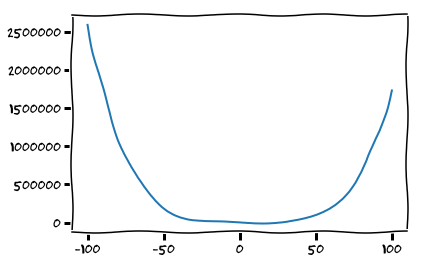

In [39]:
tt = np.linspace(-100,100)
plt.figure()
plt.plot(tt,pp(tt))
plt.show()

In [40]:
crits = solve(p.diff())

In [41]:
[a.evalf() for a in crits]

[0.258420138570251 - 5.29395592033938e-23*I,
 6.26933433283797 + 2.71050543121376e-20*I,
 8.56574334095604 + 5.29395592033938e-23*I]

In [48]:
from sympy import minpoly

In [52]:
from mpmath import findroot

In [58]:
findroot(pp,1)

ValueError: Could not find root within given tolerance. (0.240819 > 2.1684e-19)
Try another starting point or tweak arguments.

In [110]:
R.subs({x:-2.,y:2.})

13.0000000000000